<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/%E3%83%AD%E3%83%BC%E3%83%88%E3%82%99%E3%82%BB%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロードセルについて

## 必要なパッケージのインストール

In [ ]:
!git clone https://github.com/tatobari/hx711py.git

## GPIOピン
VCC(5V):  Pin 2 \
GND    :  Pin 6 \
DT(DOUT): GPIO 5 \
SCK     : GPIO 6

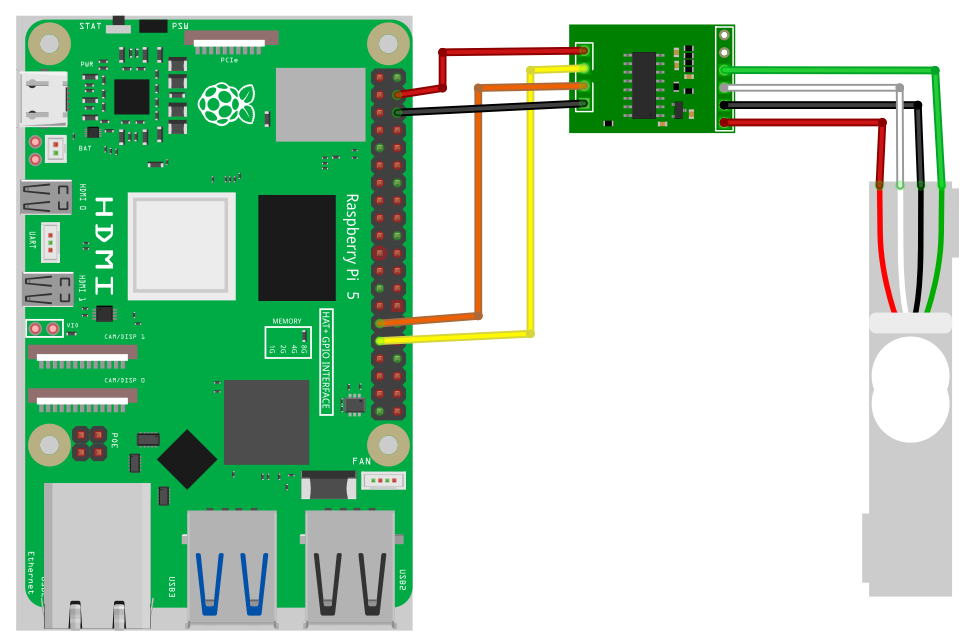

In [ ]:
#GPIOピンのリスト
!pinout

Description        : Raspberry Pi 5B rev 1.0
Revision           : d04170
SoC                : BCM2712
RAM                : 8GB
Storage            : MicroSD
USB ports          : 4 (of which 2 USB3)
Ethernet ports     : 1 (1000Mbps max. speed)
Wi-fi              : True
Bluetooth          : True
Camera ports (CSI) : 2
Display ports (DSI): 2

,--------------------------------.
| oooooooooooooooooooo J8   : +====
| 1ooooooooooooooooooo      : |USB2
|  Wi  Pi Model 5B  V1.0  fan +====
|  Fi     +---+      +---+       |
|         |RAM|      |RP1|    +====
||p       +---+      +---+    |USB3
||c      -------              +====
||i        SoC      |c|c J14     |
(        -------  J7|s|s 12 +======
|  J2 bat   uart   1|i|i oo |   Net
| pwr\..|hd|...|hd|o|1|0    +======
`-| |-1o|m0|---|m1|--------------'

J8:
   3V3  (1) (2)  5V    
 GPIO2  (3) (4)  5V    
 GPIO3  (5) (6)  GND   
 GPIO4  (7) (8)  GPIO14
   GND  (9) (10) GPIO15
GPIO17 (11) (12) GPIO18
GPIO27 (13) (14) GND   
GPIO22 (15) (16) GPIO2

In [ ]:
import sys
sys.path.append("hx711py")  # hx711.py のあるパスに変更
from hx711 import HX711
import time

hx = HX711(5, 6)  # 例: DOUT=GPIO5, SCK=GPIO6

hx.set_reading_format("MSB", "MSB")
hx.set_reference_unit(450)

hx.reset()
print("ゼロ点（風袋引き）を測定中...センサに触れないでください")
hx.tare()
print("✅ ゼロ点補正完了（この状態が 0g になります）")

print("測定開始")

try:
    while True:
        weight = hx.get_weight(5)
        print(f"Weight: {weight:.2f} g")
        time.sleep(0.5)
except KeyboardInterrupt:
    print("終了")